# Ferret data
First, we load the imaging data used in Macke et al. (2011). Its size is (npixels_x, npixels_y, conditions, trials).

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat('data/ferretdata.mat')
data = data['dat'] # data is stored in a dict
data.shape

(126, 252, 8, 100)

Reshape the data to (conditions, trials, npixels_x, npixels_y) and take a 40x40 pixel patch.

In [2]:
R = np.transpose(data, (2,3,0,1))
print(R.shape)

# take only a small part of the image (for performance reasons)
R = R[:,:,38:78,106:146]
R.shape

(8, 100, 126, 252)


(8, 100, 40, 40)

## Plot responses
Visualize the responses for the small patch

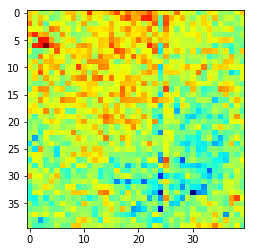

In [3]:
plt.imshow(R[0,0,:,:], cmap='jet')

## Maximum likelihood solution
Compute the solution using vector averaging (for details see OPM.ipynb)

In [4]:
from opm import calculate_map, plot_opm
from response import create_stimuli

In [5]:

V = create_stimuli([1.], [i * np.pi / 4 for i in range(4)]*2, 100)
V.shape

(8, 100, 3)

In [6]:
m = calculate_map(R, V)
m_hat = m[0] + 1j * m[1]

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd6759c8be0>)

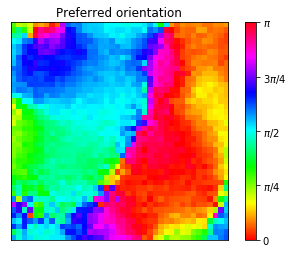

In [7]:
plot_opm(m_hat)

## Gaussian Process method
Compute a smooth OPM using the GP method (see BayesianOPM.ipynb)

In [8]:
from gp import GaussianProcessOPM

/home/dominik/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [9]:
gp = GaussianProcessOPM(size=R.shape[2:], prior_method='icd', prior_rank=100)

In [10]:
mu_post = gp.fit(stimuli=V, responses=R, noise='factoran', verbose=True)

*** Estimating prior hyperparameters ***
*** Fitting prior ***
*** Fitting posterior ***


In [11]:
mu = mu_post.reshape(3, *R.shape[2:])
result = mu[0] + 1j * mu[1]

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd66896dcc0>)

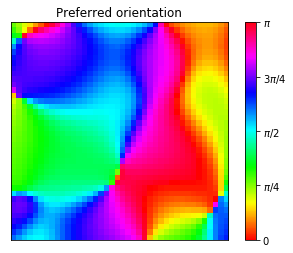

In [12]:
plot_opm(result)